# Assignment8

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [41]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [43]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [44]:
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


# Part 1
Linear Regression between Mileage and Price

In [45]:
df_lireg = df.filter(['Mileage', 'Price'], axis = 1)
df_lireg.head()

,Mileage,Price
0,8221,17314.103129
1,9135,17542.036083
2,13196,16218.847862
3,16342,16336.913140
4,19832,16339.170324


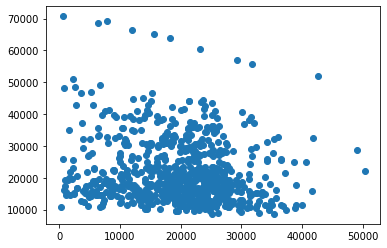

In [46]:
plt.scatter(df['Mileage'], df['Price'])

In [47]:
X = df_lireg.iloc[:,:-1].values
y = df_lireg.iloc[:,-1].values

Fitting linear regression model

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

In [49]:
r_sq = model.score(X,y)
slope = model.coef_
intercept = model.intercept_
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.02046344732348926
intercept: 24764.559006061685
slope: [-0.1725205]


The R2 score shows a very low value which is around 0.020. This means that the linear equation considering only Mileage feature for the prediction of price is not a good fit. This calls for the need for Multi-linear regression.

In [50]:
y_pred = model.predict(X)

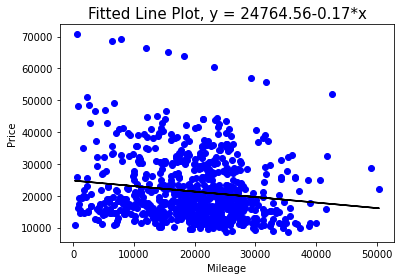

In [51]:
plt.scatter(X, y, color ='blue')
plt.plot(X, y_pred, color = 'black')
plt.title('Fitted Line Plot, y = {}{}*x'.format(round(intercept, 2), round(slope[0], 2)), fontsize = 15)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Part 2 - Multi Variable Linear Regression

Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [77]:
df_multi_lireg = df.filter(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Price'])
df_multi_lireg.head(2)

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
0,8221,6,3.1,4,1,1,1,17314.103129
1,9135,6,3.1,4,1,1,0,17542.036083


R2 score for all the selected features consideration

In [78]:
import itertools as it

In [79]:
feature_columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

In [80]:
def linreg(feature_columns, df):
  X = df[feature_columns]
  y = df['Price']
  model = LinearRegression().fit(X,y)
  print('The equation for feature {} with respect to price:\n'
  '{} + {}'.format(feature_columns, model.coef_, model.intercept_))

In [81]:
linreg(feature_columns, df_multi_lireg)

The equation for feature ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] with respect to price:
[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03] + 6758.755143598106


In [82]:
# Finding R^2 score for all the features with respect to target variable salary

def linreg_score(feature_columns, df):
  X = df[feature_columns]
  y = df['Price']
  model = LinearRegression().fit(X,y)
  r2_score = model.score(X,y)
  return r2_score

In [83]:
r2_score = linreg_score(feature_columns, df_multi_lireg)
print('The r2_score for mulitple feature is:', r2_score)

The r2_score for mulitple feature is: 0.4462643536728379


Finding the combination of factors for the best predictor for price based on R2 score.

In [85]:
def combination(cols):
  return [it.combinations(cols, n+1) for n in range(len(cols))]

In [86]:
all_combos = combination(feature_columns)

In [87]:
def all_combo_scores(all_combos, df):
  combo_scores = {}
  for m in range(len(list(all_combos))):
    for n in list(all_combos[m]):
      combo_scores[linreg_score(list(n), df)] = n
  return combo_scores

In [88]:
total_scores = all_combo_scores(all_combos, df_multi_lireg)

In [89]:
total_scores

{0.015462387624189389: ('Sound',),
 0.019251466591467037: ('Doors',),
 0.02046344732348926: ('Mileage',),
 0.024710851264124534: ('Leather',),
 0.03688121596735017: ('Mileage', 'Sound'),
 0.03701628770903431: ('Doors', 'Sound'),
 0.04039914867118721: ('Mileage', 'Doors'),
 0.04141817346866039: ('Doors', 'Leather'),
 0.04521956340886857: ('Mileage', 'Leather'),
 0.04795369092082724: ('Sound', 'Leather'),
 0.05925054392042661: ('Mileage', 'Doors', 'Sound'),
 0.06256392121987697: ('Mileage', 'Doors', 'Leather'),
 0.06687313316188848: ('Doors', 'Sound', 'Leather'),
 0.06965940622436506: ('Mileage', 'Sound', 'Leather'),
 0.08933709379370725: ('Mileage', 'Doors', 'Sound', 'Leather'),
 0.1856330092969276: ('Cruise',),
 0.19288948066869627: ('Cruise', 'Sound'),
 0.1996382468921617: ('Doors', 'Cruise'),
 0.2083536888853531: ('Doors', 'Cruise', 'Sound'),
 0.2093138558315859: ('Mileage', 'Cruise'),
 0.21721656906779263: ('Mileage', 'Cruise', 'Sound'),
 0.2210042052179847: ('Cruise', 'Leather'),
 

From the above score combinations, we can see that max R2 score is generated based on all the selected features. This is the best combination, but the R2 score is too less and it calls for adding categorical features into the price prediction which needs to be done by converting the categorical feature to numerical feature.

# Part 3

Creating dummy variables for categorical variables of Make, Model and Type to find the best possible combination for predicting the price.

In [152]:
cars_df = pd.read_csv("/content/drive/MyDrive/Datasets/car_data.csv")

In [153]:
cars_df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [154]:
cars_df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [155]:
cars_df['Type'].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [156]:
cars_df['Model'].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [157]:
Makedummies = pd.get_dummies(cars_df.Make)
Typedummies = pd.get_dummies(cars_df.Type)
Modeldummies = pd.get_dummies(cars_df.Model)

In [158]:
cars_df = cars_df.join(Makedummies)
cars_df = cars_df.join(Typedummies)
cars_df = cars_df.join(Modeldummies)

In [159]:
cars_df = cars_df.drop(['Make', 'Type', 'Model', 'Trim'], axis = 1)

In [160]:
cars_df.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,...,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
def linreg(feature_columns, df):
  X = cars_df.iloc[:,1:].values
  y = cars_df.iloc[:,0].values
  model = LinearRegression().fit(X,y)
  r2_score = model.score(X,y)
  return r2_score, model

In [162]:
r2_score, _ = linreg(cars_df.columns, cars_df)

In [163]:
r2_score

0.9804768702447504

After using categorical variables along with numerical variable for the price prediction, we can see that the r2 score is increased and has a score of 0.98, which gives the best fit for the model.